# Integrating PCA in Pipelines - Lab done by `Eugene Maina`

## Introduction

In a previous section, you learned about how to use pipelines in scikit-learn to combine several supervised learning algorithms in a manageable pipeline. In this lesson, you will integrate PCA along with classifiers in the pipeline. 

## Objectives

In this lab you will: 

- Integrate PCA in scikit-learn pipelines 

## The Data Science Workflow

You will be following the data science workflow:

1. Initial data inspection, exploratory data analysis, and cleaning
2. Feature engineering and selection
3. Create a baseline model
4. Create a machine learning pipeline and compare results with the baseline model
5. Interpret the model and draw conclusions

##  Initial data inspection, exploratory data analysis, and cleaning

You'll use a dataset created by the Otto group, which was also used in a [Kaggle competition](https://www.kaggle.com/c/otto-group-product-classification-challenge/data). The description of the dataset is as follows:

The Otto Group is one of the world’s biggest e-commerce companies, with subsidiaries in more than 20 countries, including Crate & Barrel (USA), Otto.de (Germany) and 3 Suisses (France). They are selling millions of products worldwide every day, with several thousand products being added to their product line.

A consistent analysis of the performance of their products is crucial. However, due to their global infrastructure, many identical products get classified differently. Therefore, the quality of product analysis depends heavily on the ability to accurately cluster similar products. The better the classification, the more insights the Otto Group can generate about their product range.

In this lab, you'll use a dataset containing:
- A column `id`, which is an anonymous id unique to a product
- 93 columns `feat_1`, `feat_2`, ..., `feat_93`, which are the various features of a product
- a column `target` - the class of a product



The dataset is stored in the `'otto_group.csv'` file. Import this file into a DataFrame called `data`, and then: 

- Check for missing values 
- Check the distribution of columns 
- ... and any other things that come to your mind to explore the data 

In [1]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

%matplotlib inline

data = pd.read_csv('otto_group.csv', index_col='id')

print(data.info())



<class 'pandas.core.frame.DataFrame'>
Index: 61878 entries, 1 to 61878
Data columns (total 94 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   feat_1   61878 non-null  int64 
 1   feat_2   61878 non-null  int64 
 2   feat_3   61878 non-null  int64 
 3   feat_4   61878 non-null  int64 
 4   feat_5   61878 non-null  int64 
 5   feat_6   61878 non-null  int64 
 6   feat_7   61878 non-null  int64 
 7   feat_8   61878 non-null  int64 
 8   feat_9   61878 non-null  int64 
 9   feat_10  61878 non-null  int64 
 10  feat_11  61878 non-null  int64 
 11  feat_12  61878 non-null  int64 
 12  feat_13  61878 non-null  int64 
 13  feat_14  61878 non-null  int64 
 14  feat_15  61878 non-null  int64 
 15  feat_16  61878 non-null  int64 
 16  feat_17  61878 non-null  int64 
 17  feat_18  61878 non-null  int64 
 18  feat_19  61878 non-null  int64 
 19  feat_20  61878 non-null  int64 
 20  feat_21  61878 non-null  int64 
 21  feat_22  61878 non-null  int64 
 22  fea

In [2]:
# Your code here

data.describe().T

,count,mean,std,min,25%,50%,75%,max
feat_1,61878.0,0.386680,1.525330,0.0,0.0,0.0,0.0,61.0
feat_2,61878.0,0.263066,1.252073,0.0,0.0,0.0,0.0,51.0
feat_3,61878.0,0.901467,2.934818,0.0,0.0,0.0,0.0,64.0
feat_4,61878.0,0.779081,2.788005,0.0,0.0,0.0,0.0,70.0
feat_5,61878.0,0.071043,0.438902,0.0,0.0,0.0,0.0,19.0
...,...,...,...,...,...,...,...,...
feat_89,61878.0,0.457772,1.527385,0.0,0.0,0.0,0.0,61.0
feat_90,61878.0,0.812421,4.597804,0.0,0.0,0.0,0.0,130.0
feat_91,61878.0,0.264941,2.045646,0.0,0.0,0.0,0.0,52.0
feat_92,61878.0,0.380119,0.982385,0.0,0.0,0.0,0.0,19.0


In [3]:
# Your code here
data.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
4,1,0,0,1,6,1,5,0,0,1,...,0,1,2,0,0,0,0,0,0,Class_1
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [4]:
# Your code here
data.isnull().value_counts().T

feat_1  feat_2  feat_3  feat_4  feat_5  feat_6  feat_7  feat_8  feat_9  feat_10  feat_11  feat_12  feat_13  feat_14  feat_15  feat_16  feat_17  feat_18  feat_19  feat_20  feat_21  feat_22  feat_23  feat_24  feat_25  feat_26  feat_27  feat_28  feat_29  feat_30  feat_31  feat_32  feat_33  feat_34  feat_35  feat_36  feat_37  feat_38  feat_39  feat_40  feat_41  feat_42  feat_43  feat_44  feat_45  feat_46  feat_47  feat_48  feat_49  feat_50  feat_51  feat_52  feat_53  feat_54  feat_55  feat_56  feat_57  feat_58  feat_59  feat_60  feat_61  feat_62  feat_63  feat_64  feat_65  feat_66  feat_67  feat_68  feat_69  feat_70  feat_71  feat_72  feat_73  feat_74  feat_75  feat_76  feat_77  feat_78  feat_79  feat_80  feat_81  feat_82  feat_83  feat_84  feat_85  feat_86  feat_87  feat_88  feat_89  feat_90  feat_91  feat_92  feat_93  target
False   False   False   False   False   False   False   False   False   False    False    False    False    False    False    False    False    False    False    Fal

If you look at all the histograms, you can tell that a lot of the data are zero-inflated, so most of the variables contain mostly zeros and then some higher values here and there. No normality, but for most machine learning techniques this is not an issue. 

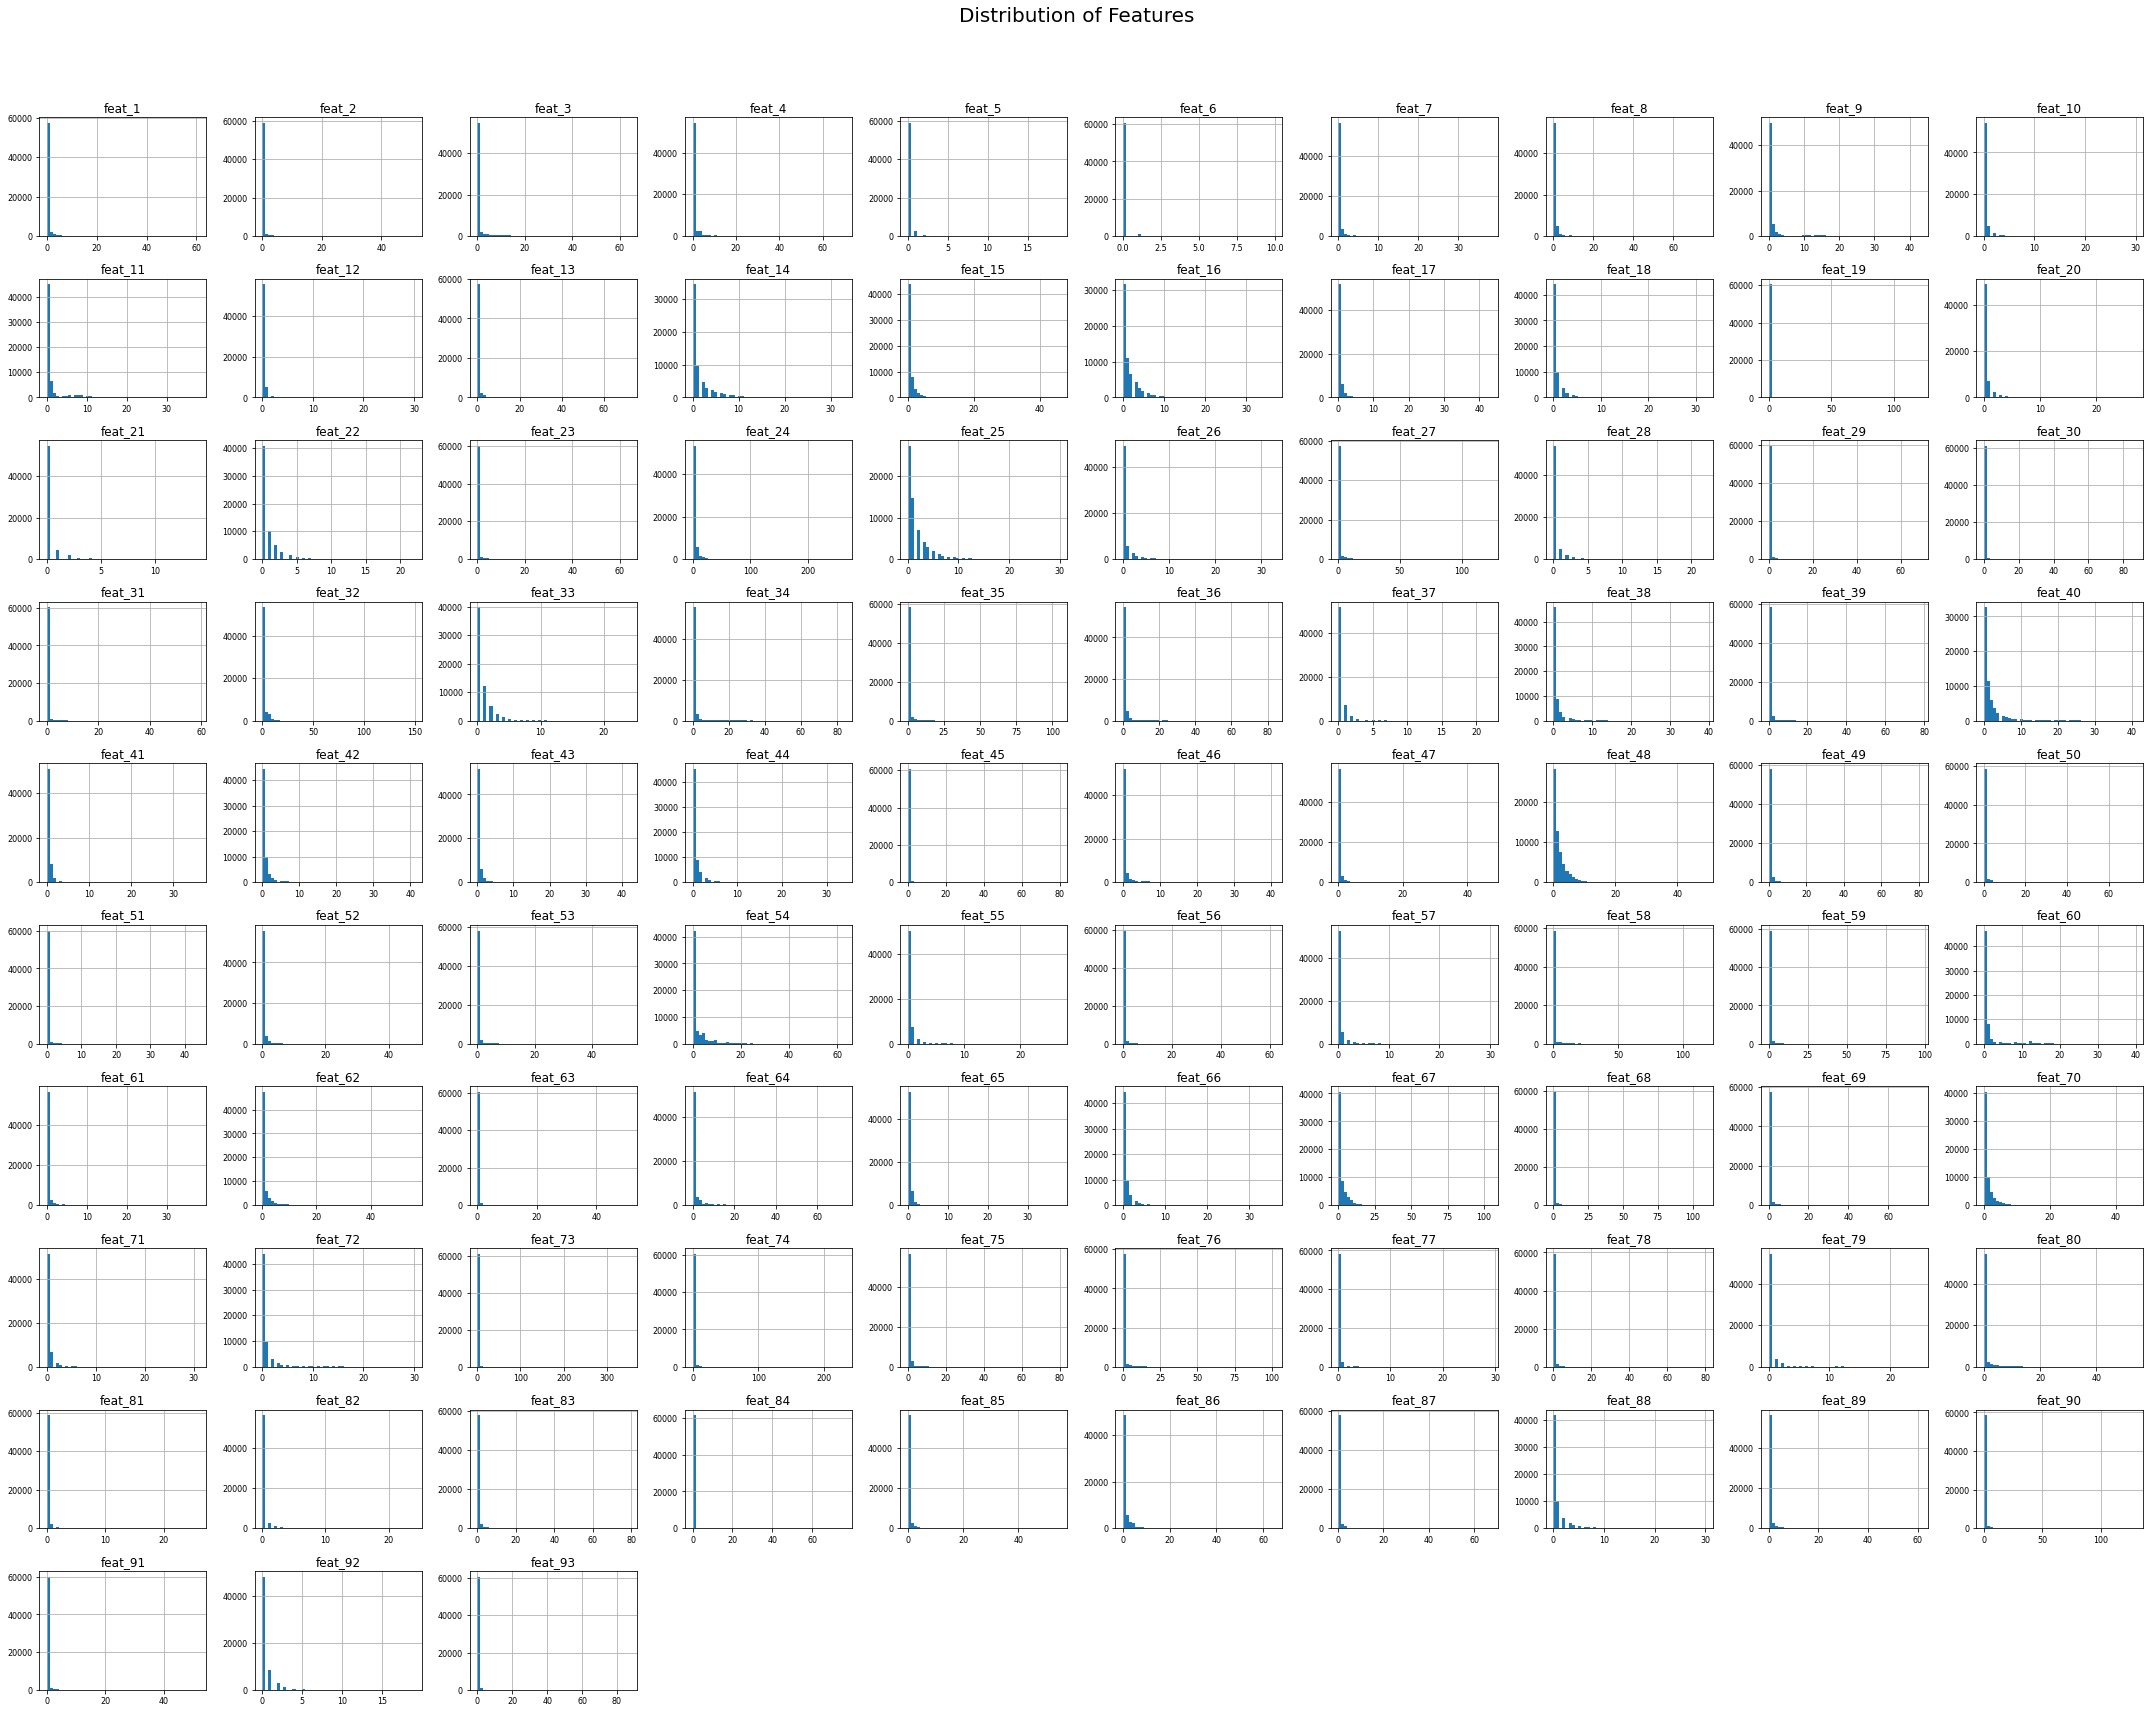

In [5]:
# Your code here

# Checking the distribution of the columns
data.hist(figsize=(30, 25), bins=50, xlabelsize=8, ylabelsize=8)
plt.suptitle('Distribution of Features', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

Because there are so many zeroes, most values above zero will seem to be outliers. The safe decision for this data is to not delete any outliers and see what happens. With many 0s, sparse data is available and high values may be super informative. Moreover, without having any intuitive meaning for each of the features, we don't know if a value of ~260 is actually an outlier.

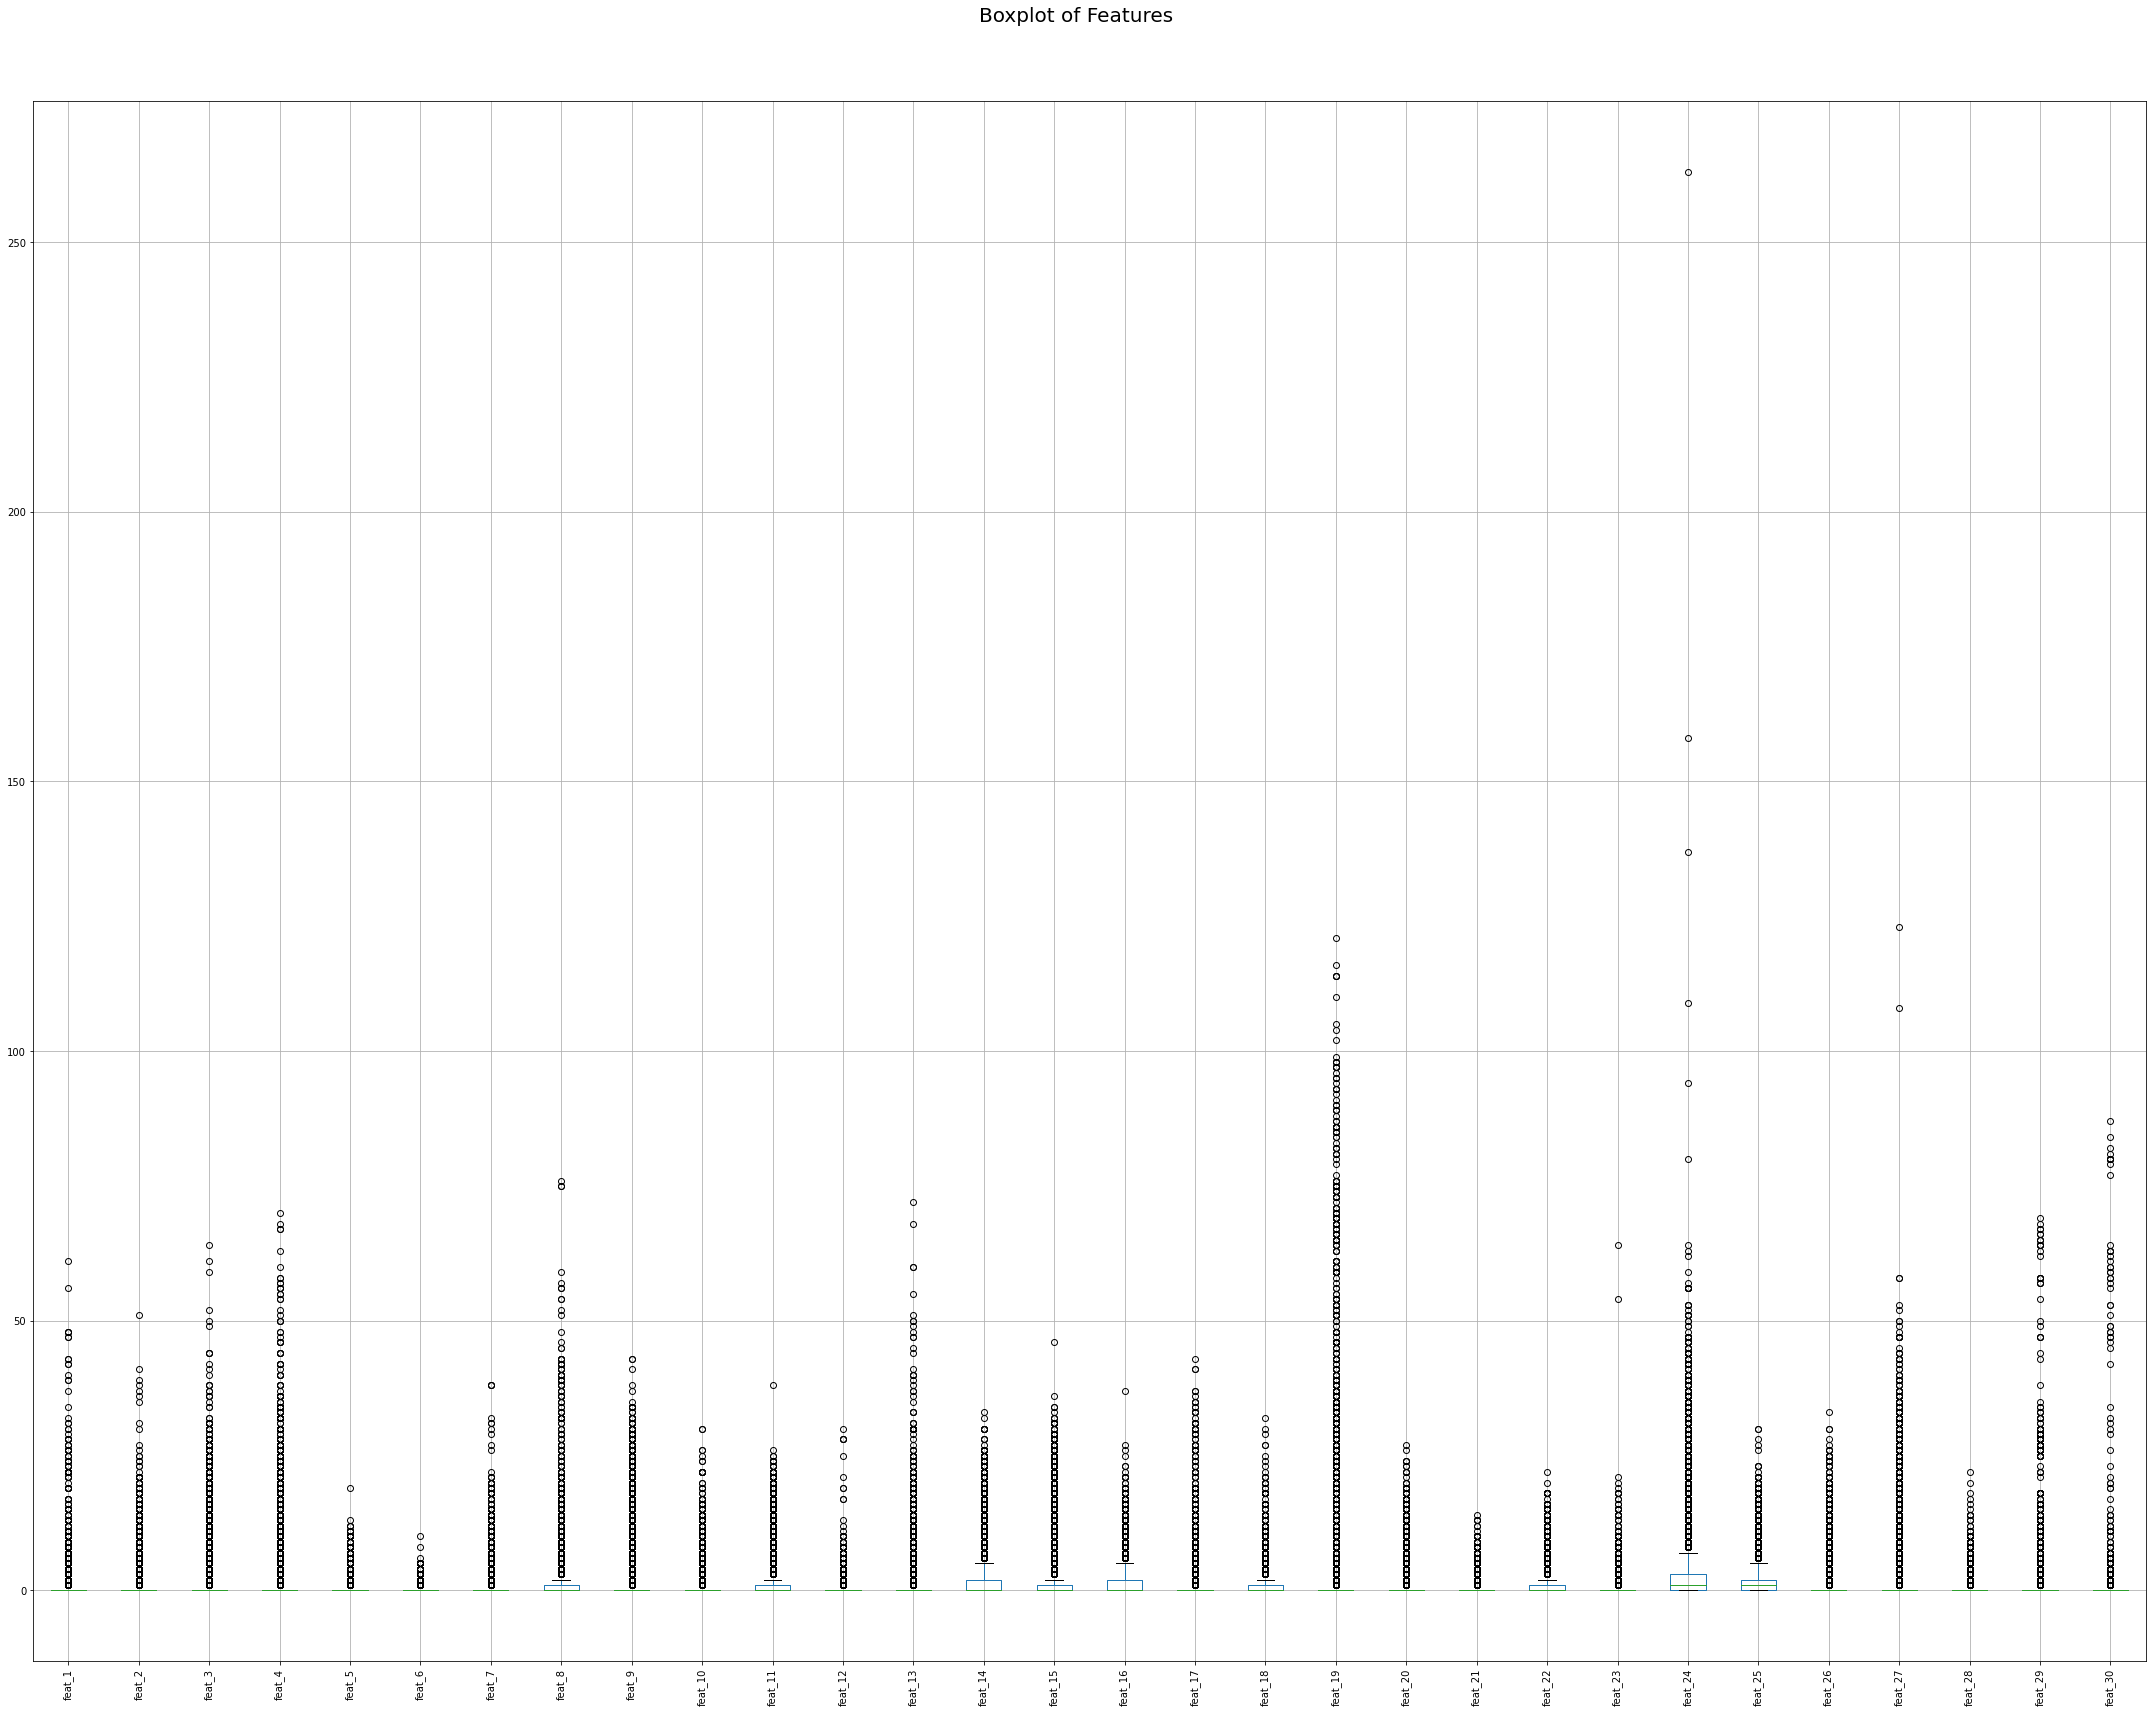

In [6]:
# Selecting only the first 30 features by column name
features = data.loc[:, 'feat_1':'feat_30'].copy()
features.boxplot(figsize=(30, 25), rot=90)
plt.suptitle('Boxplot of Features', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Feature engineering and selection with PCA

Have a look at the correlation structure of your features using a [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

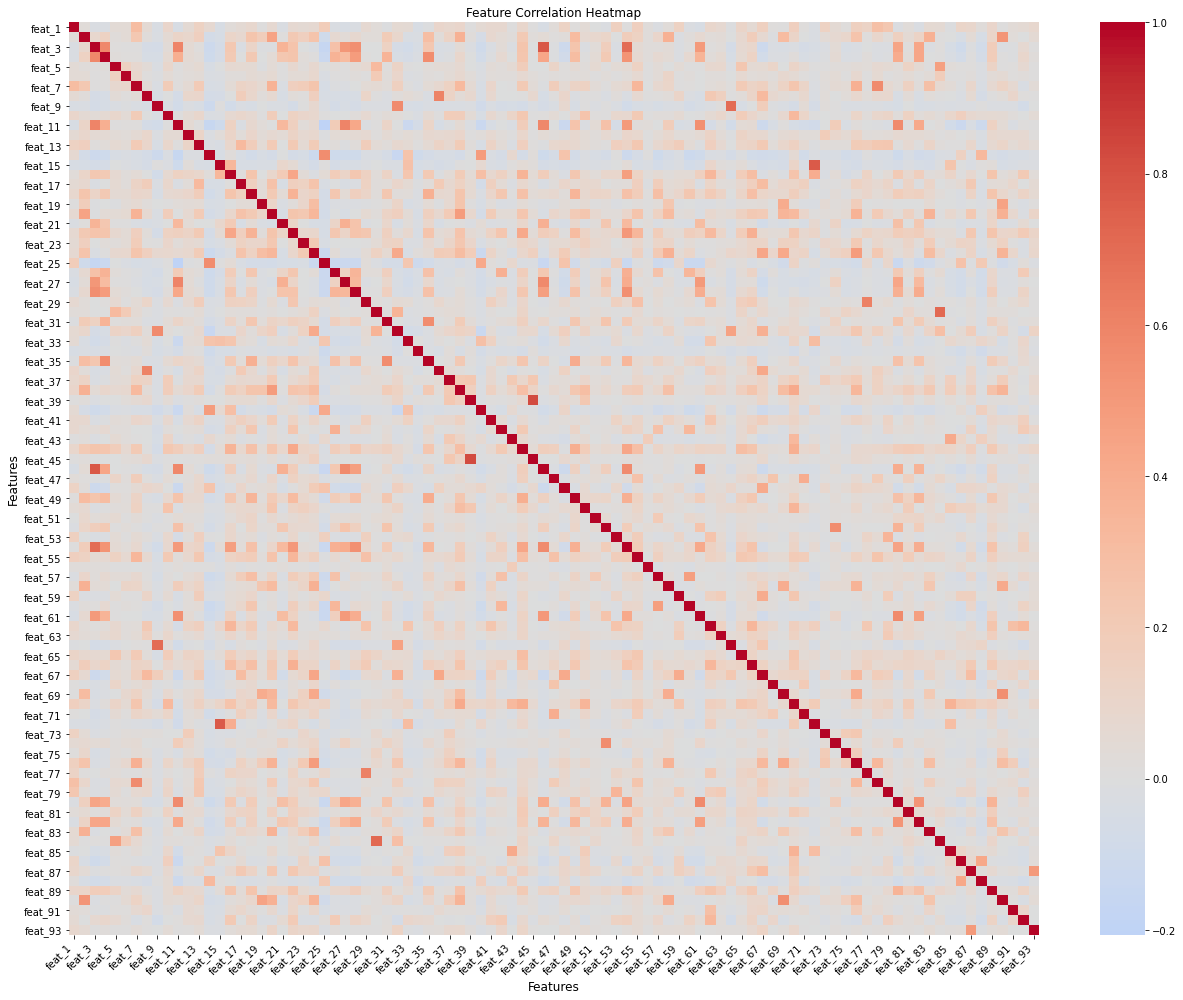

In [7]:
# Your code here
import seaborn as sns

# Correlation heatmap
corr = data.drop(columns='target').corr()

plt.figure(figsize=(18, 14))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

Use PCA to select a number of features in a way that you still keep 80% of your explained variance.

In [8]:
# Your code here
features = data.drop(columns='target')

target = data['target']

In [9]:
# Your code here
pca = PCA(n_components=0.8)

principal_components = pca.fit_transform(features)

## Create a train-test split with a test size of 40%

This is a relatively big training set, so you can assign 40% to the test set. Set the `random_state` to 42. 

In [10]:
# Your code here
from sklearn.model_selection import train_test_split

principal_components_df = pd.DataFrame(principal_components, index=features.index, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])
finaldf = pd.concat([principal_components_df, target], axis=1)

X = finaldf.drop(columns='target')
y = finaldf['target']



In [11]:
# Your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.4)

## Create a baseline model

Create your baseline model *in a pipeline setting*. In the pipeline: 

- Your first step will be to scale your features down to the number of features that ensure you keep just 80% of your explained variance (which we saw before)
- Your second step will be to build a basic logistic regression model 

Make sure to fit the model using the training set and test the result by obtaining the accuracy using the test set. Set the `random_state` to 123. 

In [12]:
# Your code here
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

pipeline = Pipeline([
    ('pca', PCA(n_components=0.8)),
    ('logistic', LogisticRegression(max_iter=1000, random_state=123))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


In [13]:
# Your code here
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

     Class_1       0.36      0.09      0.14       795
     Class_2       0.61      0.90      0.73      6456
     Class_3       0.47      0.17      0.24      3141
     Class_4       0.69      0.14      0.23      1070
     Class_5       0.96      0.93      0.94      1085
     Class_6       0.81      0.90      0.85      5694
     Class_7       0.62      0.36      0.46      1107
     Class_8       0.74      0.77      0.76      3370
     Class_9       0.73      0.76      0.75      2034

    accuracy                           0.70     24752
   macro avg       0.67      0.56      0.57     24752
weighted avg       0.68      0.70      0.66     24752



In [14]:
# Your code here
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6972769877181642


## Create a pipeline consisting of a linear SVM, a simple decision tree, and a simple random forest classifier

Repeat the above, but now create three different pipelines:
- One for a standard linear SVM
- One for a default decision tree
- One for a random forest classifier

In [15]:
# Your code here
# ⏰ This cell may take several minutes to run
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline for SVM Classifier
pipeline_svm = Pipeline([
    ('pca', PCA(n_components=0.8)),
    ('svm', SVC(kernel='linear', random_state=123))
])
pipeline_svm.fit(X_train, y_train)
y_pred_svm = pipeline_svm.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

# Create a pipeline for Decision Tree Classifier
pipeline_dt = Pipeline([
    ('pca', PCA(n_components=0.8)),
    ('dt', DecisionTreeClassifier(random_state=123))
])
pipeline_dt.fit(X_train, y_train)
y_pred_dt = pipeline_dt.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


# Create a pipeline for Random Forest Classifier
pipeline_rf = Pipeline([
    ('pca', PCA(n_components=0.8)),
    ('rf', RandomForestClassifier(random_state=123))
])
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


SVM Classification Report:
              precision    recall  f1-score   support

     Class_1       0.36      0.09      0.14       795
     Class_2       0.58      0.97      0.73      6456
     Class_3       0.35      0.00      0.01      3141
     Class_4       0.76      0.03      0.05      1070
     Class_5       0.96      0.94      0.95      1085
     Class_6       0.84      0.90      0.87      5694
     Class_7       0.70      0.44      0.54      1107
     Class_8       0.73      0.80      0.76      3370
     Class_9       0.74      0.77      0.75      2034

    accuracy                           0.70     24752
   macro avg       0.67      0.55      0.53     24752
weighted avg       0.67      0.70      0.63     24752

SVM Accuracy: 0.6979234001292824
Decision Tree Classification Report:
              precision    recall  f1-score   support

     Class_1       0.27      0.28      0.27       795
     Class_2       0.66      0.65      0.66      6456
     Class_3       0.39      0.41  

## Pipeline with grid search

Construct two pipelines with grid search:
- one for random forests - try to have around 40 different models
- one for the AdaBoost algorithm 

### Random Forest pipeline with grid search

In [22]:
# Your code here 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

param_grid_rf = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5, 10]
}

# Create a pipeline for Random Forest
pipeline_rf = Pipeline([
    ('pca', PCA(n_components=0.8)),
    ('rf', RandomForestClassifier(random_state=123))
])

# Wrap the pipeline with GridSearchCV
pipeline_rf_gcv = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid_rf,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1,
    refit=True
)



In [23]:
# Your code here
# ⏰ This cell may take a long time to run!

# Fit the pipeline with Grid Search
pipeline_rf_gcv.fit(X_train, y_train)
y_pred_rf_gs = pipeline_rf_gcv.predict(X_test)
print("Random Forest with Grid Search Classification Report:")
print(classification_report(y_test, y_pred_rf_gs))
print("Random Forest with Grid Search Accuracy:", accuracy_score(y_test, y_pred_rf_gs))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Random Forest with Grid Search Classification Report:
              precision    recall  f1-score   support

     Class_1       0.63      0.23      0.34       795
     Class_2       0.68      0.85      0.75      6456
     Class_3       0.52      0.41      0.46      3141
     Class_4       0.71      0.19      0.30      1070
     Class_5       0.96      0.96      0.96      1085
     Class_6       0.92      0.92      0.92      5694
     Class_7       0.70      0.53      0.60      1107
     Class_8       0.78      0.89      0.83      3370
     Class_9       0.79      0.83      0.81      2034

    accuracy                           0.76     24752
   macro avg       0.74      0.65      0.66     24752
weighted avg       0.75      0.76      0.74     24752

Random Forest with Grid Search Accuracy: 0.756060116354234


Use your grid search object along with `.cv_results` to get the full result overview

In [20]:
# Your code here 
pipeline_rf_gcv.cv_results_

{'mean_fit_time': array([21.94023498, 44.71357115, 92.77895164, 24.40565864, 47.51079226,
        90.44816168, 22.41737143, 46.00763679, 88.33209801, 14.56923834,
        29.47101005, 59.02407026, 15.03985643, 29.14039548, 58.00095765,
        13.70754719, 29.85543609, 58.81720599, 22.91803042, 44.45194435,
        85.65726217, 21.12470722, 42.16224464, 81.33087444, 20.99698242,
        41.63009953, 60.96686347]),
 'std_fit_time': array([0.83619761, 0.70569307, 0.41262392, 0.3393407 , 0.52600709,
        1.74975713, 0.50977193, 1.25716028, 0.85754377, 0.35213815,
        0.78304943, 0.41287533, 0.24729625, 0.64477766, 0.97942739,
        0.18559255, 0.38538466, 0.84325917, 0.58157661, 0.40464341,
        0.91065752, 0.36012161, 0.32053166, 3.76073111, 0.68562382,
        0.70905904, 4.94646652]),
 'mean_score_time': array([0.42904035, 0.8860906 , 1.20565708, 0.34445016, 0.68222531,
        1.23706738, 0.63919036, 0.71404696, 1.17034229, 0.2504007 ,
        0.49393837, 0.84008964, 0.250

### AdaBoost

In [25]:
# Your code here
# ⏰ This cell may take several minutes to run
param_grid_ada = {
    'ada__n_estimators': [50, 100, 200],
    'ada__learning_rate': [0.01, 0.1, 1]
}

# Create a pipeline for AdaBoost with Grid Search
pipeline_ada = Pipeline([
    ('pca', PCA(n_components=0.8)),
    ('ada', AdaBoostClassifier(random_state=123))
])

# Wrap the pipeline with GridSearchCV
pipeline_ada_gcv = GridSearchCV(
    estimator=pipeline_ada,
    param_grid=param_grid_ada,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1,
    refit=True
)

# Fit the pipeline
pipeline_ada_gcv.fit(X_train, y_train)
y_pred_ada_gs = pipeline_ada_gcv.predict(X_test)
print("AdaBoost with Grid Search Classification Report:")
print(classification_report(y_test, y_pred_ada_gs))
print("AdaBoost with Grid Search Accuracy:", accuracy_score(y_test, y_pred_ada_gs))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
AdaBoost with Grid Search Classification Report:


c:\Users\eugene.maina\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\eugene.maina\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\eugene.maina\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

              precision    recall  f1-score   support

     Class_1       0.00      0.00      0.00       795
     Class_2       0.59      0.92      0.72      6456
     Class_3       0.45      0.08      0.13      3141
     Class_4       0.33      0.00      0.01      1070
     Class_5       0.90      0.91      0.90      1085
     Class_6       0.81      0.86      0.84      5694
     Class_7       0.56      0.34      0.42      1107
     Class_8       0.64      0.70      0.67      3370
     Class_9       0.62      0.79      0.70      2034

    accuracy                           0.66     24752
   macro avg       0.54      0.51      0.49     24752
weighted avg       0.61      0.66      0.60     24752

AdaBoost with Grid Search Accuracy: 0.6630979314802844


Use your grid search object along with `.cv_results` to get the full result overview: 

In [26]:
# Your code here 
pipeline_ada_gcv.cv_results_


{'mean_fit_time': array([15.77045695, 30.98220722, 65.61203329, 16.56630397, 32.9802374 ,
        66.3569208 , 17.29807782, 34.21858414, 50.27929346]),
 'std_fit_time': array([0.72682343, 0.37574867, 0.82513251, 0.16292049, 0.1841484 ,
        2.35121114, 0.10880558, 0.49750888, 5.55340277]),
 'mean_score_time': array([0.70154659, 1.02888719, 2.2300334 , 0.5278004 , 1.17714818,
        1.77416388, 0.57094685, 0.97860487, 1.03911996]),
 'std_score_time': array([0.21114444, 0.03463732, 0.16756481, 0.04246426, 0.03646761,
        0.27793742, 0.01533435, 0.10345182, 0.19310456]),
 'param_ada__learning_rate': masked_array(data=[0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 1, 1, 1],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_ada__n_estimators': masked_array(data=[50, 100, 200, 50, 100, 200, 50, 100, 200],
              mask=[False, False, False, False, False, False, False, False,
    

### Level-up (Optional): SVM pipeline with grid search 

As extra level-up work, construct a pipeline with grid search for support vector machines. 
* Make sure your grid isn't too big. You'll see it takes quite a while to fit SVMs with non-linear kernel functions!

In [ ]:
# Your code here
# ⏰ This cell may take a very long time to run!

Use your grid search object along with `.cv_results` to get the full result overview: 

In [ ]:
# Your code here 

## Note

Note that this solution is only one of many options. The results in the Random Forest and AdaBoost models show that there is a lot of improvement possible by tuning the hyperparameters further, so make sure to explore this yourself!

## Summary 

Great! You've gotten a lot of practice in using PCA in pipelines. What algorithm would you choose and why?